In [1]:
import glob
import random
import os
import math
import numpy as np
import os
from skimage.io import imread, imsave
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [2]:
files = glob.glob("data/custom/labels/*.txt")
result = ""
for file in files:
    path = file.replace('/labels','/images').replace('.txt','.png')
    f = open(file,'r')
    bbs = list(f)
    for bb in bbs:
        objs = bb.split(' ')
        objs[0] = int(objs[0])
        objs[1] = float(objs[1])
        objs[2] = float(objs[2])
        objs[3] = float(objs[3])
        objs[4] = float(objs[4])
        class_name = 'Uninfected' if objs[0] == 0 else 'Parasitized'
        x1 = int(round((objs[1] - (objs[3]/2))*1600))
        y1 = int(round((objs[2] - (objs[4]/2))*1200))
        x2 = int(round((objs[3])*1600)) + x1
        y2 = int(round((objs[4])*1200)) + y1
        result += '\n' + path + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + class_name

print(result)


data/custom/images/0000000049.png,922,518,1071,667,Uninfected
data/custom/images/0000000000.png,807,655,962,810,Uninfected
data/custom/images/0000000000.png,421,647,588,813,Uninfected
data/custom/images/0000000000.png,982,655,1162,835,Parasitized
data/custom/images/0000000000.png,615,267,759,411,Uninfected
data/custom/images/0000000051.png,439,641,596,798,Uninfected
data/custom/images/0000000051.png,816,96,968,248,Uninfected
data/custom/images/0000000051.png,157,269,353,465,Parasitized
data/custom/images/0000000001.png,589,648,728,788,Uninfected
data/custom/images/0000000050.png,692,1052,825,1186,Uninfected
data/custom/images/0000000050.png,57,270,225,438,Uninfected
data/custom/images/0000000050.png,456,599,613,756,Parasitized
data/custom/images/0000000002.png,794,848,949,1003,Uninfected
data/custom/images/0000000002.png,844,4,1046,207,Parasitized
data/custom/images/0000000052.png,288,378,445,535,Uninfected
data/custom/images/0000000052.png,1070,475,1198,603,Uninfected
data/custom/ima

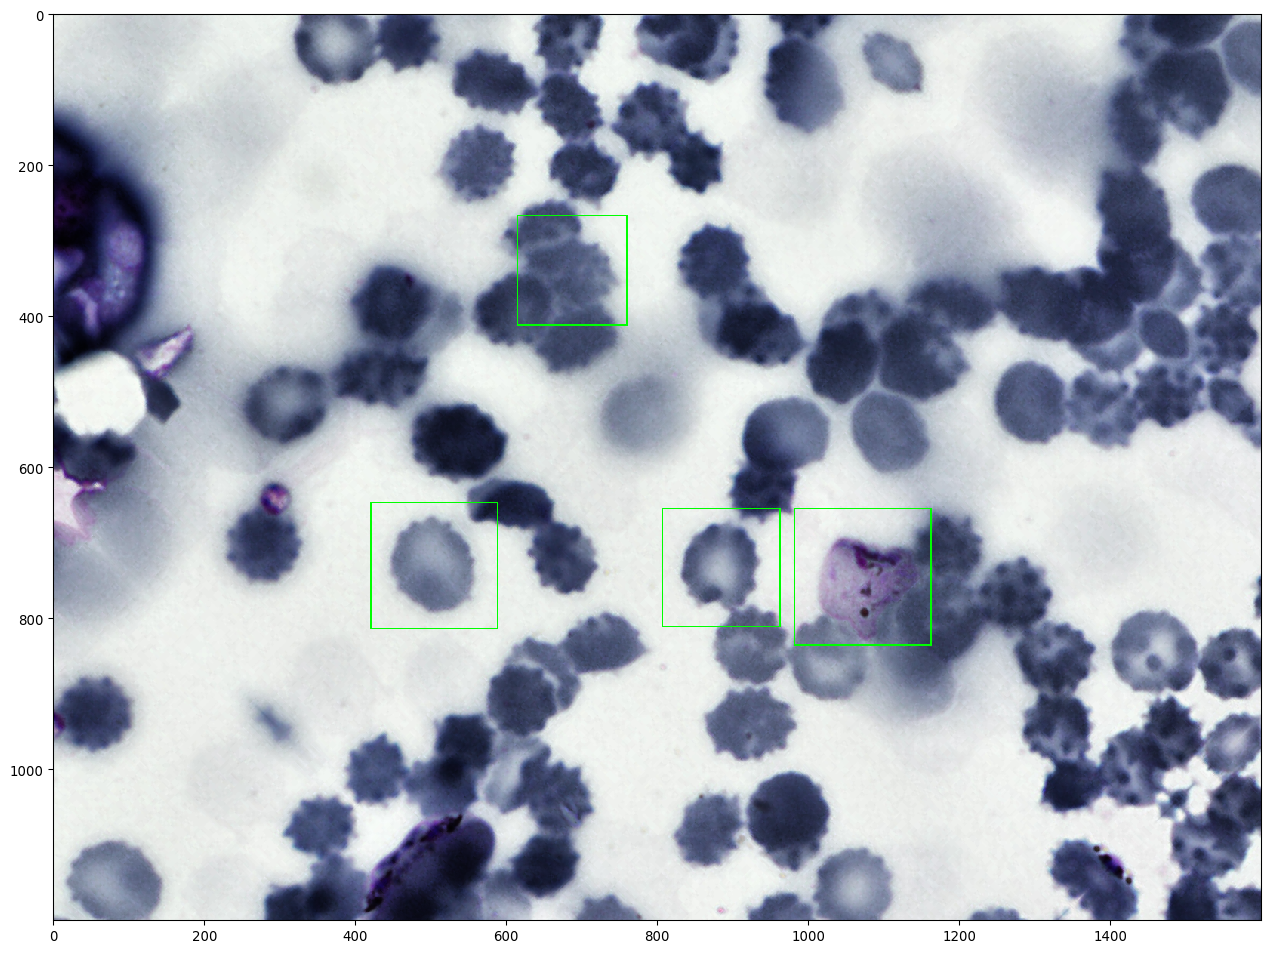

In [4]:
rects = []
img = imread("data/custom/images/0000000000.png")
height,weigth,channel = img.shape
rects.append(BoundingBox(x1=807,y1=655,x2=962,y2=810,label='Uninfected'))
rects.append(BoundingBox(x1=421,y1=647,x2=588,y2=813,label='Uninfected'))
rects.append(BoundingBox(x1=982,y1=655,x2=1162,y2=835,label='Parasitized'))
rects.append(BoundingBox(x1=615,y1=267,x2=759,y2=411,label='Uninfected'))
bbs = BoundingBoxesOnImage(rects,shape=img.shape)
ia.imshow(bbs.draw_on_image(img, size=2))

In [9]:
result = result[1:]

In [10]:
f = open('anotationfile.txt','w')
f.write(result)

2437036